# Week5 exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.ma as ma

### Let's calculate the 95% confidence interval on the regression coefficient for different months and different cities

In [2]:
# time range 1950-2020
tr=[1950,2020]
df=pd.read_excel('Boston_Seattle_Sacramento_Atlanta.xlsx',sheet_name='Boston')
data=df.to_numpy()
data[data==-999]=np.nan
x0=data[:,0]
tind=(x0>=tr[0]) & (x0<=tr[1])
year=data[tind,0] # time
jan1=data[tind,1] # January
sep1=data[tind,9] # September

In [3]:
# calculate 95% CI of January temperature trend
# covariance for January
gd=(~np.isnan(jan1)) # check if missing data
N=np.size(year)
df=N-2
c=np.cov(year[gd],jan1[gd])
a1=c[0,1]/c[0,0]
b1=np.mean(jan1[gd])-a1*np.mean(year[gd])
MSE=np.sum((jan1[gd]-(a1*year[gd]+b1))**2)/(N-2)
SE2=MSE/np.sum((year[gd]-np.mean(year[gd]))**2)
SE=np.sqrt(SE2)
print('SE of the linear trend is '+str(SE.round(3)))
print('Linear trend of January is '+str(a1.round(3))+' (+/-) '+str(2*SE.round(3))+' degF/yr')

SE of the linear trend is 0.024
Linear trend of January is 0.018 (+/-) 0.048 degF/yr


In [4]:
# Matrix way for September
gd=(~np.isnan(sep1))
N=np.size(year[gd])
df=N-2
A=np.ones((N,2))
A[:,0]=year[gd]
xvec=np.linalg.pinv(A)@sep1[gd]
a2=xvec[0]
b2=xvec[1]
MSE=np.sum((sep1[gd]-(a2*year[gd]+b2))**2)/(N-2)
SE2=MSE/np.sum((year[gd]-np.mean(year[gd]))**2)
SE=np.sqrt(SE2)
print('SE of the linear trend is '+str(SE.round(3)))
print('Linear trend of September is '+str(a2.round(3))+' (+/-) '+str(2*SE.round(3))+' degF/yr')

SE of the linear trend is 0.011
Linear trend of September is 0.039 (+/-) 0.022 degF/yr


### January trend is NOT statistically significant because 95% CI covers zero. However Septermber trend is statistically significant. Its 95% CI is always positive. 

Let's look at their time series

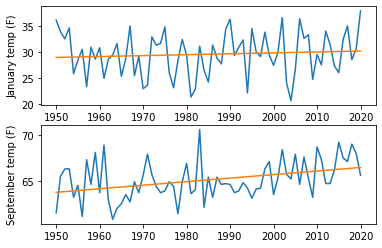

In [5]:
plt.subplot(211)
plt.plot(year,jan1)
plt.plot(year,a1*year+b1)
plt.ylabel('January temp (F)')
plt.subplot(212)
plt.plot(year,sep1)
plt.plot(year,a2*year+b2)
plt.ylabel('September temp (F)')
plt.show()

### Determine the statistical significance of the correlation of temperatures between different US cities. 

In [6]:
df1=pd.read_excel('Boston_Seattle_Sacramento_Atlanta.xlsx',sheet_name='Boston')
df2=pd.read_excel('Boston_Seattle_Sacramento_Atlanta.xlsx',sheet_name='Seattle')
df3=pd.read_excel('Boston_Seattle_Sacramento_Atlanta.xlsx',sheet_name='Sacramento')
df4=pd.read_excel('Boston_Seattle_Sacramento_Atlanta.xlsx',sheet_name='Atlanta')

In [7]:
# pick a month
mon='JAN' # January
year=df1['Year']
N=np.size(year)
Temp=np.zeros((N,4)) # prepare an empty array

In [8]:
# 4 cities
city=['BOS','SEA','SAC','ATL']
Temp[:,0]=df1[mon]
Temp[:,1]=df2[mon]
Temp[:,2]=df3[mon]
Temp[:,3]=df4[mon]
# create the "Mask" for missing data
Mask=(Temp==-999)
Tempma=ma.array(Temp,mask=Mask)

In [9]:
# select a period
tr=[1900,2020]
gd=(year>=tr[0]) & (year<=tr[1])
D=Tempma[gd,:]
c=np.ma.corrcoef(D.T)
df=pd.DataFrame(c,columns=city)
df

,BOS,SEA,SAC,ATL
0,1.000000,-0.231503,-0.127610,0.607097
1,-0.231503,1.000000,0.547065,-0.406423
2,-0.127610,0.547065,1.000000,-0.210828
3,0.607097,-0.406423,-0.210828,1.000000


In [10]:
# Let's perform significance test with 95% confidence level (2 tail)
tval = np.abs(c)*np.sqrt((N-2)/(1-c**2))
# since N > 30, we can use Gaussian distribution
tcrit= 2.0
test = (tval) > tcrit
df=pd.DataFrame(test,columns=city)
df

,BOS,SEA,SAC,ATL
0,NaN,True,False,True
1,True,NaN,True,True
2,False,True,NaN,True
3,True,True,True,NaN


### During winter-months, the temperature of east and west coast cities are negatively correlated: PNA (Pacific North American teleconnection pattern)
For more information, see [NOAA website](https://www.cpc.ncep.noaa.gov/data/teledoc/pna.shtml)